<a href="https://colab.research.google.com/github/Ashwitha-Pabba/NLP/blob/main/NLP_LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD THE DATASET USING PANDAS LIBRARY FROM KAGGLE
and INSPECTED THE DATA SET

In [7]:
import pandas as pd
d=pd.read_csv('/content/Tweets.csv')
print(d.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

EXTRACTING THE TWEETS

In [8]:
tweets = d['text']
print(tweets[:5])


0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object


VISUALIZE THE HASTAGS

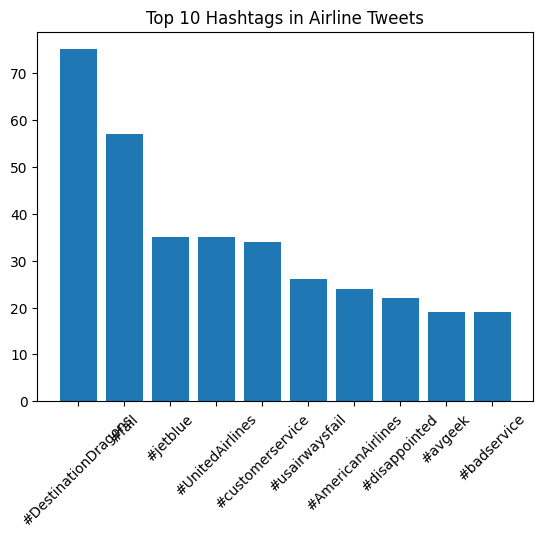

In [9]:
import re
import matplotlib.pyplot as plt
from collections import Counter

# Extract hashtags
hashtags = []
for tweet in tweets:
    hashtags.extend(re.findall(r"#\w+", tweet))

# Count top hashtags
hashtag_counts = Counter(hashtags).most_common(10)

# Plot
plt.bar([x[0] for x in hashtag_counts], [x[1] for x in hashtag_counts])
plt.xticks(rotation=45)
plt.title("Top 10 Hashtags in Airline Tweets")
plt.show()


CLEAN THE DATA AND PRINT THE DATA BEFORE CLEANING AND AFTER CLEANING

In [17]:
import pandas as pd
# Load dataset
d = pd.read_csv("Tweets.csv")
# Print first 5 rows BEFORE cleaning
print("=== BEFORE CLEANING ===")
print(d['text'].head())
import re
import string
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)                     # remove mentions
    text = re.sub(r'#', '', text)                        # remove hashtag symbol
    text = re.sub(r'\d+', '', text)                      # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower().strip()
    return text
# Apply cleaning
d['clean_text'] = d['text'].apply(clean_text)
# Print first 5 rows AFTER cleaning
print("\n=== AFTER CLEANING ===")
print(d['clean_text'].head())






=== BEFORE CLEANING ===
0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

=== AFTER CLEANING ===
0                                           what  said
1    plus youve added commercials to the experience...
2    i didnt today must mean i need to take another...
3    its really aggressive to blast obnoxious enter...
4              and its a really big bad thing about it
Name: clean_text, dtype: object


WORD TOKENISATION USING LIBRARY NLTK

In [19]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab') # Download 'punkt_tab' as suggested by the error message
d['tokens'] = d['clean_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


STOP WORD REMOVAL

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
d['tokens'] = d['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LEMMATISATION USING SPACY LIBRARY

In [40]:
import spacy

# Load the small English model. If this is the first time running, you might need to download it:
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

def lemmatize_tokens(tokens):
    doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    return [token.lemma_ for token in doc]

d['lemmas'] = d['tokens'].apply(lemmatize_tokens)
print(d[['text', 'tokens', 'lemmas']].head())

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                              tokens                lemmas  
0                                              [say]                    []  
1  [plus, you, ve, add, commercial, experience, t...        [, , , , , , ]  
2  [do, not, today, must, mean, need, take, anoth...    [, , , , , , , , ]  
3  [really, aggressive, blast, obnoxious, enterta...  [, , , , , , , , , ]  
4                          [really, big, bad, thing]              [, , , ]  


APPLY POS TAGGING USING SPACY

In [35]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Example: take first 5 cleaned tweets
sample_tweets = d['clean_text'].head()

for i, tweet in enumerate(sample_tweets, 1):
    doc = nlp(tweet)
    print(f"\n=== Tweet {i} ===")
    print("Original:", tweet)
    print("POS Tags:")
    for token in doc:
        print(f"{token.text:<15} {token.pos_:<10} {token.tag_:<10} {spacy.explain(token.tag_)}")



=== Tweet 1 ===
Original: what  said
POS Tags:
what            PRON       WP         wh-pronoun, personal
                SPACE      _SP        whitespace
said            VERB       VBD        verb, past tense

=== Tweet 2 ===
Original: plus youve added commercials to the experience tacky
POS Tags:
plus            CCONJ      CC         conjunction, coordinating
you             PRON       PRP        pronoun, personal
ve              AUX        VBP        verb, non-3rd person singular present
added           VERB       VBN        verb, past participle
commercials     NOUN       NNS        noun, plural
to              ADP        IN         conjunction, subordinating or preposition
the             DET        DT         determiner
experience      NOUN       NN         noun, singular or mass
tacky           ADV        RB         adverb

=== Tweet 3 ===
Original: i didnt today must mean i need to take another trip
POS Tags:
i               PRON       PRP        pronoun, personal
did         

REJOINING THE TEXT(PROCESSES TWEET AND CORRESPONDING LABEL)

In [37]:
# Rejoin tokens into processed text
d['processed_text'] = d['tokens'].apply(lambda x: " ".join(x))

# Keep only the processed tweet and its sentiment label
final_d = d[['processed_text', 'airline_sentiment']]

# Print first 10 rows
print("=== PROCESSED TWEETS WITH LABELS ===")
print(final_d.head(10))


=== PROCESSED TWEETS WITH LABELS ===
                                      processed_text airline_sentiment
0                                               said           neutral
1      plus youve added commercials experience tacky          positive
2       didnt today must mean need take another trip           neutral
3  really aggressive blast obnoxious entertainmen...          negative
4                               really big bad thing          negative
5  seriously would pay flight seats didnt playing...          negative
6  yes nearly every time fly vx “ ear worm ” ’ go...          positive
7  really missed prime opportunity men without ha...           neutral
8                                     well didnt…but          positive
9              amazing arrived hour early youre good          positive


MAKE A COMPLETE PIPELINE
- Load the dataset
- Print tweets before and after cleaning
- Visualize hashtags
- Clean text
- Tokenize words
- Remove stopwords
- Lemmatize
- POS tagging
- Rejoin tokens
- Output processed tweets with sentiment labels


  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== BEFORE CLEANING ===
0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object


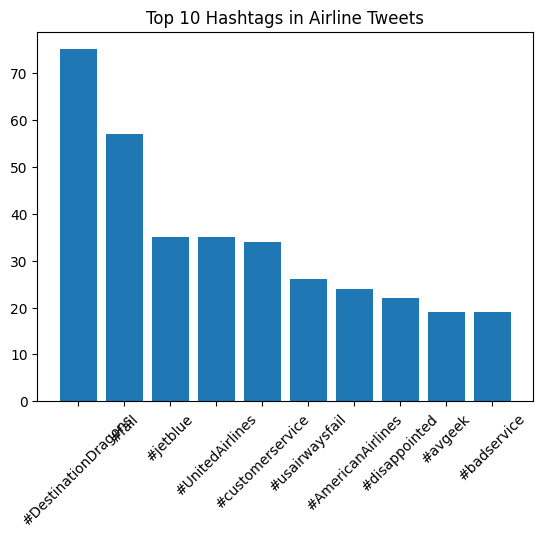


=== AFTER CLEANING ===
0                                           what  said
1    plus youve added commercials to the experience...
2    i didnt today must mean i need to take another...
3    its really aggressive to blast obnoxious enter...
4              and its a really big bad thing about it
Name: clean_text, dtype: object

=== POS TAGGING EXAMPLES ===

Tweet 1: what  said
what            PRON       WP         wh-pronoun, personal
                SPACE      _SP        whitespace
said            VERB       VBD        verb, past tense

Tweet 2: plus youve added commercials to the experience tacky
plus            CCONJ      CC         conjunction, coordinating
you             PRON       PRP        pronoun, personal
ve              AUX        VBP        verb, non-3rd person singular present
added           VERB       VBN        verb, past participle
commercials     NOUN       NNS        noun, plural
to              ADP        IN         conjunction, subordinating or preposition
the  

In [39]:

# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# =========================
# LOAD DATASET
# =========================
d = pd.read_csv("Tweets.csv")

# Print BEFORE cleaning
print("=== BEFORE CLEANING ===")
print(d['text'].head())

# =========================
# VISUALIZE HASHTAGS
# =========================
hashtags = []
for tweet in d['text']:
    hashtags.extend(re.findall(r"#\w+", tweet))

hashtag_counts = Counter(hashtags).most_common(10)

plt.bar([x[0] for x in hashtag_counts], [x[1] for x in hashtag_counts])
plt.xticks(rotation=45)
plt.title("Top 10 Hashtags in Airline Tweets")
plt.show()

# =========================
# CLEANING FUNCTION
# =========================
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)                     # remove mentions
    text = re.sub(r'#', '', text)                        # remove hashtag symbol
    text = re.sub(r'\d+', '', text)                      # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower().strip()
    return text

d['clean_text'] = d['text'].apply(clean_text)

# Print AFTER cleaning
print("\n=== AFTER CLEANING ===")
print(d['clean_text'].head())

# =========================
# TOKENIZATION
# =========================
from nltk.tokenize import word_tokenize
d['tokens'] = d['clean_text'].apply(word_tokenize)

# =========================
# STOPWORD REMOVAL
# =========================
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
d['tokens'] = d['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# =========================
# LEMMATIZATION
# =========================
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

d['tokens'] = d['tokens'].apply(lemmatize_tokens)

# =========================
# POS TAGGING (Example for first 5 tweets)
# =========================
print("\n=== POS TAGGING EXAMPLES ===")
for i, tweet in enumerate(d['clean_text'].head(), 1):
    doc = nlp(tweet)
    print(f"\nTweet {i}: {tweet}")
    for token in doc:
        print(f"{token.text:<15} {token.pos_:<10} {token.tag_:<10} {spacy.explain(token.tag_)}")

# =========================
# REJOIN TOKENS
# =========================
d['processed_text'] = d['tokens'].apply(lambda x: " ".join(x))

# =========================
# FINAL OUTPUT: PROCESSED TWEETS + LABEL
# =========================
final_df= d[['processed_text', 'airline_sentiment']]
print("\n=== PROCESSED TWEETS WITH LABELS ===")
print(final_df.head(10))

